Student Information
Name: 陳彥瑋

Student ID: 112034574

GitHub ID: IVesChen

Kaggle name: IVes

Kaggle private scoreboard snapshot:
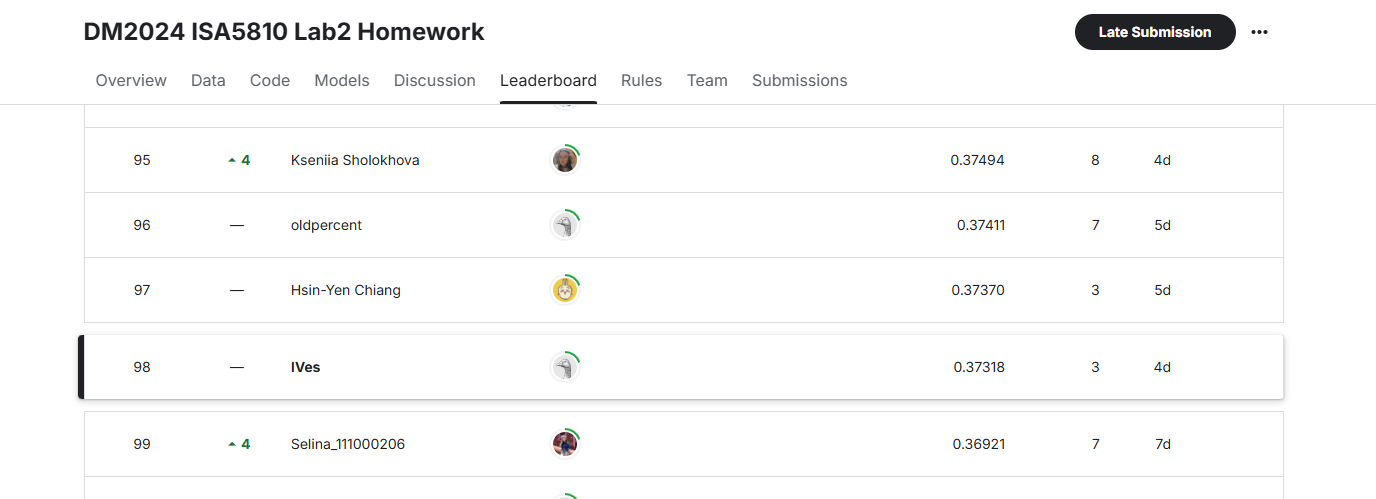
Instructions
1. First: This part is worth 30% of your grade. Do the take home exercises in the DM2024-Lab2-master Repo. You may need to copy some cells from the Lab notebook to this notebook.
2. Second: This part is worth 30% of your grade. Participate in the in-class Kaggle Competition regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place
in the Private Leaderboard ranking:
Bottom 40%: Get 20% of the 30% available for this section.
Top 41% - 100%: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)
Submit your last submission BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday). Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the img folder of this repository and rerun the cell Student Information.
3. Third: This part is worth 30% of your grade. A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model.
You can also mention different things you tried and insights you gained.
4. Fourth: This part is worth 10% of your grade. It's hard for us to follow if your code is messy :'(, so please tidy up your notebook.
Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.
Make sure to commit and save your changes to your repository BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday).


In [123]:
import json

import pandas as pd    
file = open('tweets_DM.json', 'r', encoding='utf-8')
papers = []
for line in file.readlines():
    dic = json.loads(line)
    papers.append(dic)

#read json data into list of dict.
raw_data_identification = pd.read_csv('data_identification.csv')
raw_data_emotion = pd.read_csv('emotion.csv')

In [124]:
tweet_dict = {x['_source']['tweet']['tweet_id']: x['_source']['tweet']['text'] for x in papers}
emotion_dict = dict(zip(raw_data_emotion['tweet_id'], raw_data_emotion['emotion']))
#emotion_dict

texts = []
exmotions = []
texts = [tweet_dict[id] for id in raw_data_identification['tweet_id'] if id in tweet_dict]
emotions = [emotion_dict[id] if id in emotion_dict else None for id in raw_data_identification['tweet_id']]

In [125]:
new_df = raw_data_identification
new_df["emotion"] = emotions
new_df["text"] = texts

train = new_df[new_df['identification'] == 'train']
test = new_df[new_df['identification'] == 'test']

In [126]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import nltk

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [127]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

tf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

text_tf= tf.fit_transform(train['text'])
text_tf_test= tf.fit_transform(test['text'])



In [18]:
from sklearn.model_selection import train_test_split

x = text_tf
y = train['emotion']
x_train, x_validate, y_train, y_validate = train_test_split(x,y, test_size=0.3, random_state=1)

NameError: name 'text_tf' is not defined

In [35]:
dt = DecisionTreeClassifier(
    criterion='gini',        # Measure the quality of a split using Gini impurity
    max_depth=10,            # Limit the depth to avoid overfitting and speed up training
    min_samples_split=10,    # Require at least 10 samples before splitting a node
    min_samples_leaf=5,      # Ensure there are at least 5 samples at each leaf node
    max_features='sqrt',     # Use square root of features for each split (reduces complexity)
    splitter='random',       # Use random splitting to reduce computation time
    class_weight='balanced'  # Adjust weights to handle class imbalance (if needed)
)
dt.fit(x_train,y_train)
preddt = dt.predict(x_validate)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_validate,preddt))

Confusion Matrix for Decision Tree:
[[     2      6  11602     33     30     56      1    355]
 [     3   3531  67012    181    458     72     17   3223]
 [    15     47  40246    153     93    158     24   1006]
 [     0     12  17865    729     84     35     10    424]
 [    14    300 139432    471   4654    201     40   9660]
 [     4     51  55179    207    225    710     26   1521]
 [     0     23  13998    103     52     41     41    425]
 [     4    481  54809     83    565     73     10   5783]]


In [36]:
score = round(accuracy_score(y_validate,preddt)*100,2)
print("Score:",score)

print("Classification Report:")
print(classification_report(y_validate,preddt))

Score: 12.75
Classification Report:
              precision    recall  f1-score   support

       anger       0.05      0.00      0.00     12085
anticipation       0.79      0.05      0.09     74497
     disgust       0.10      0.96      0.18     41742
        fear       0.37      0.04      0.07     19159
         joy       0.76      0.03      0.06    154772
     sadness       0.53      0.01      0.02     57923
    surprise       0.24      0.00      0.01     14683
       trust       0.26      0.09      0.14     61808

    accuracy                           0.13    436669
   macro avg       0.39      0.15      0.07    436669
weighted avg       0.55      0.13      0.08    436669



In [50]:
preddt_test = dt.predict(x_test)

In [53]:
submission = pd.DataFrame()
submission['id'] = test['tweet_id']
submission['emotion'] = pd.DataFrame(preddt_test)

In [56]:
print(submission['emotion'].isna().sum())
print(submission['emotion'].unique())
print(submission['emotion'].value_counts(ascending=True))

321065
['disgust' 'fear' 'joy' 'anticipation' 'trust' 'sadness' 'surprise' nan]
emotion
anticipation       21
surprise           26
joy                42
fear               52
sadness            57
trust             109
disgust         90600
Name: count, dtype: int64


In [57]:
submission.to_csv('submission.csv', index=False)

In [6]:
def get_tweet(data):
    tweets = data["text"]
    labels = data["emotion"]
    return tweets, labels

In [10]:
x = train.loc[:, train.columns != "emotion"]
y = train['emotion']
x_train, x_validate, y_train, y_validate = train_test_split(x,y, test_size=0.3, random_state=1)
train = pd.concat([x_train, y_train], axis=1)
val = pd.concat([x_validate, y_validate], axis=1)
tweets, labels = get_tweet(train)

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<UNK>")
tokenizer.fit_on_texts(tweets)

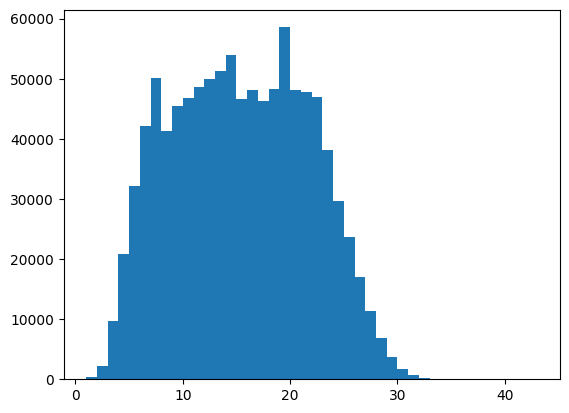

In [19]:
lengths = [len(s.split()) for s in tweets]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [20]:
# We notice that most of the tweets have less than 30 words
maxlen = 30

from tensorflow.keras.preprocessing.sequence import pad_sequences

# we need to pad or truncate the sequences to a fixed length, specified by the variable "maxlen".
# This is to ensure that all sequences have the same length, which is necessary for some models to work.
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
    return padded_sequences

padded_train_sequences = get_sequences(tokenizer, tweets)

In [38]:
classes = set(labels)
classes
labels

array([1, 2, 3, ..., 4, 6, 4], dtype=int64)

In [22]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((value,key) for key, value in class_to_index.items())

labels_to_ids = lambda labels : np.array([class_to_index.get(x) for x in labels])
ids_to_labels = lambda ids : np.array([index_to_class.get(x) for x in ids])

In [23]:
index_to_class

{0: 'joy',
 1: 'fear',
 2: 'sadness',
 3: 'anger',
 4: 'disgust',
 5: 'surprise',
 6: 'trust',
 7: 'anticipation'}

In [24]:
train_labels = labels_to_ids(labels)

In [49]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(train['emotion'].tolist())

max_length = max([len(seq) for seq in padded_train_sequences])
one_hot_labels = keras.utils.to_categorical(labels)

x = train.loc[:, train.columns != "emotion"]
y = train['emotion']
x_train, x_validate, y_train, y_validate = train_test_split(padded_train_sequences,one_hot_labels, test_size=0.3, random_state=1)

padded_train_sequences = get_sequences(tokenizer, tweets)

val_tweets, val_labels = get_tweet(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = labels_to_ids(val_labels)

In [60]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#import nlp
import random
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalMaxPooling1D, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
#model = tf.keras.Sequential([
    #tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    #tf.keras.layers.Dense(8, activation='softmax')
#])
# Define the model
# Encode the string labels to integers


#model = Sequential()
#model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                    #output_dim=128, input_length=max_length))
#model.add(Flatten())
#model.add(Dense(units=128, activation="relu"))
#model.add(Dense(units=len(one_hot_labels[0]), activation="softmax"))

#model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
#model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_validate, y_validate))
# Embedding layer (use smaller output_dim for more efficiency)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                    output_dim=32,  # Smaller embedding dimension for more efficiency
                    input_length=max_length))

# Global Average Pooling instead of Flatten to reduce parameter count
model.add(GlobalMaxPooling1D())

# Dense layer with fewer units for efficiency
model.add(Dense(units=32, activation="relu"))

# Dropout layer to prevent overfitting (optional, but recommended for large datasets)
model.add(Dropout(0.5))

# Output layer with softmax activation (for multi-class classification)
model.add(Dense(units=len(one_hot_labels[0]), activation="softmax"))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)
# Print model summary to see the architecture and number of parameters
model.summary()
model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_validate, y_validate), callbacks=[early_stopping])

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_3               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
22289/22289 ━━━━━━━━━━━━━━━━━━━━ 2111s 95ms/step - accuracy: 0.4508 - loss: 1.5266 - val_accuracy: 0.5251 - val_loss: 1.3113
Epoch 2/3
22289/22289 ━━━━━━━━━━━━━━━━━━━━ 2079s 93ms/step - accuracy: 0.5190 - loss: 1.3340 - val_accuracy: 0.5356 - val_loss: 1.2795
Epoch 3/3
22289/22289 ━━━━━━━━━━━━━━━━━━━━ 2144s 94ms/step - accuracy: 0.5293 - loss: 1.3012 - val_accuracy: 0.5399 - val_loss: 1.2691


In [61]:
model.save('tweet_emotion_IVes_model.h5')

In [114]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

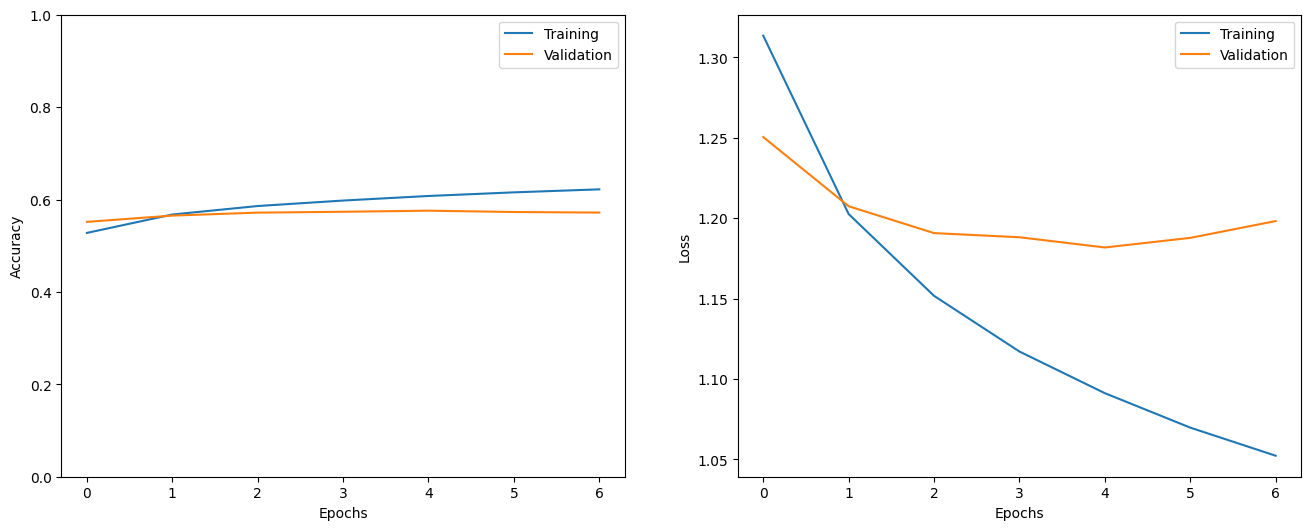

In [115]:
show_history(m)

In [62]:
test_tweets, test_labels = get_tweet(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = labels_to_ids(test_labels)

In [119]:
_ = model.evaluate(test_sequences, test_labels)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type NoneType).

In [64]:
# predictions = model.predict_classes(test_sequences)
predict_x=model.predict(test_sequences) 
classes_x=np.argmax(predict_x,axis=1)

12875/12875 ━━━━━━━━━━━━━━━━━━━━ 8s 612us/step


In [79]:
twet = pd.DataFrame()
twet['text'] = pd.DataFrame(test_tweets)
print(twet['text'].isna().sum())

test_sequences = get_sequences(tokenizer, test_tweets)

0


In [80]:
predict_x=model.predict(test_sequences) 

12875/12875 ━━━━━━━━━━━━━━━━━━━━ 8s 642us/step


In [89]:
predict_x.shape
classes_x=np.argmax(predict_x,axis=1)
classes_x.shape

(411972,)

In [116]:
submission_v3 = pd.DataFrame()
submission_v3['id'] = df__
submission_v3['emotion'] = pd.DataFrame(label_encoder.inverse_transform(classes_x))

In [117]:
submission_v3
print(submission_v3['emotion'].isna().sum())
#print(submission_v3['emotion'].unique())
#print(submission_v3['emotion'].value_counts(ascending=True))
submission_v3.shape

0


(411972, 2)

In [101]:
submission_v3['id'] = test['tweet_id']

In [110]:
df__ = test['tweet_id'].reset_index()

In [114]:
df__=df__.drop('index', axis = 1)

In [119]:
submission_v3.to_csv('submission_v3.csv')